# Progressive Passes
Calculating Progressive Passes for Bruno Fernandes in the Europa League final against Villareal

### What is a progressive Pass
An open play pass that move the ball more than 25% closer to the goal

### Importing Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [2]:
df = pd.read_csv('progressivepasses.csv')
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5


### Cleaning Data

We will consider Dani Parejo's progressive passing

In [3]:
df = df.loc[df['teamId']=='Manchester United']
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
7,0,35.0,Manchester United,66.4,97.4,FirstHalf,Tackle,Successful,10.0,NaN,NaN
11,0,55.0,Manchester United,70.0,46.7,FirstHalf,Foul,Unsuccessful,11.0,NaN,NaN


In [4]:
passes = df.loc[df['type'] == 'Pass']
passes.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
33,2,2.0,Manchester United,38.6,53.9,FirstHalf,Pass,Successful,11.0,45.9,66.4
34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2


In [5]:
bruno = passes.loc[passes['playerId'] == 18.0].reset_index()
bruno.head()

,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
1,34,2,9.0,Manchester United,58.1,95.0,FirstHalf,Pass,Unsuccessful,18.0,62.4,94.4
2,41,2,12.0,Manchester United,60.1,95.2,FirstHalf,Pass,Unsuccessful,18.0,61.3,95.2
3,119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8
4,130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8


### Creating Pitch

In [6]:
# Scaling data to pitch size(120, 80)
bruno.x = bruno.x * 1.2 
bruno.y = bruno.y * 0.8
bruno.endX = bruno.endX * 1.2 
bruno.endY = bruno.endY * 0.7

### Distance Formula

In [7]:
bruno['beginning'] = np.sqrt(np.square(120-bruno['x'])+np.square(40-bruno['y']))
bruno['end'] = np.sqrt(np.square(120-bruno['endX'])+np.square(40-bruno['endY']))
bruno.head()

,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end
0,2,0,0.0,Manchester United,59.88,40.00,FirstHalf,Pass,Successful,18.0,37.80,41.72,60.120000,82.217993
1,34,2,9.0,Manchester United,69.72,76.00,FirstHalf,Pass,Unsuccessful,18.0,74.88,66.08,61.839133,52.115073
2,41,2,12.0,Manchester United,72.12,76.16,FirstHalf,Pass,Unsuccessful,18.0,73.56,66.64,60.000333,53.538427
3,119,6,11.0,Manchester United,78.48,77.44,FirstHalf,Pass,Successful,18.0,75.96,61.46,55.907638,48.990338
4,130,6,55.0,Manchester United,83.76,24.24,FirstHalf,Pass,Successful,18.0,89.28,13.16,39.518542,40.793431


### Checking for Progressive Passes

In [8]:
bruno['progressive'] = [(bruno['end'][x])/(bruno['beginning'][x])<0.75 for x in range(len(bruno.beginning))]
bruno.head()

,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end,progressive
0,2,0,0.0,Manchester United,59.88,40.00,FirstHalf,Pass,Successful,18.0,37.80,41.72,60.120000,82.217993,False
1,34,2,9.0,Manchester United,69.72,76.00,FirstHalf,Pass,Unsuccessful,18.0,74.88,66.08,61.839133,52.115073,False
2,41,2,12.0,Manchester United,72.12,76.16,FirstHalf,Pass,Unsuccessful,18.0,73.56,66.64,60.000333,53.538427,False
3,119,6,11.0,Manchester United,78.48,77.44,FirstHalf,Pass,Successful,18.0,75.96,61.46,55.907638,48.990338,False
4,130,6,55.0,Manchester United,83.76,24.24,FirstHalf,Pass,Successful,18.0,89.28,13.16,39.518542,40.793431,False


In [9]:
progressive = bruno.loc[bruno['progressive']==True].reset_index()
progressive

,level_0,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end,progressive
0,9,270,18,18.0,Manchester United,88.20,74.16,FirstHalf,Pass,Unsuccessful,18.0,106.08,40.88,46.670607,13.947788,True
1,14,473,31,58.0,Manchester United,78.48,62.32,FirstHalf,Pass,Successful,18.0,99.60,59.36,47.139079,28.124182,True
2,15,497,32,42.0,Manchester United,82.92,12.24,FirstHalf,Pass,Unsuccessful,18.0,106.20,35.21,46.320017,14.607673,True
3,19,581,37,3.0,Manchester United,70.56,75.36,FirstHalf,Pass,Successful,18.0,85.20,68.04,60.783577,44.690957,True
4,30,932,52,27.0,Manchester United,111.72,8.32,SecondHalf,Pass,Unsuccessful,18.0,120.00,33.11,32.744172,6.890000,True
5,32,974,56,33.0,Manchester United,83.52,1.76,SecondHalf,Pass,Successful,18.0,117.72,7.49,52.849674,32.589853,True
6,33,1111,63,46.0,Manchester United,92.28,7.28,SecondHalf,Pass,Unsuccessful,18.0,103.80,23.38,42.883526,23.209145,True
7,35,1144,65,3.0,Manchester United,88.20,63.92,SecondHalf,Pass,Successful,18.0,105.48,60.62,39.792039,25.219334,True
8,36,1150,65,15.0,Manchester United,76.56,65.12,SecondHalf,Pass,Successful,18.0,93.12,65.45,50.180155,37.016711,True
9,37,1181,67,51.0,Manchester United,88.44,67.84,SecondHalf,Pass,Unsuccessful,18.0,116.16,30.17,42.084429,10.553412,True


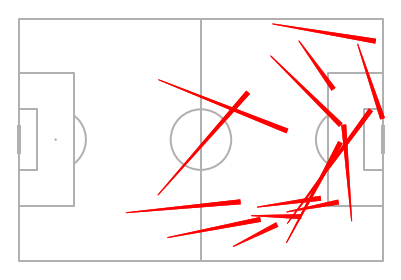

In [10]:
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw()
pitch.lines(progressive.x, progressive.y, progressive.endX, progressive.endY, comet=True, ax = ax, color = 'red')